# Methods of visualising and utilising anm flagged data

In [2]:
# setwd('./College/ssen/ssen_weather_combine')
data <- read.csv("./database/combined_ssen_weather.csv", header=TRUE, sep=",", dec=".")

In [3]:
summary(data)

      X.1                     elec_timestamp       demand        demand_max   
 Min.   :     1   2019-10-27 01:00:05:     2   Min.   : 0.71   Min.   :35.70  
 1st Qu.: 98764   2019-10-27 01:01:05:     2   1st Qu.:12.46   1st Qu.:35.70  
 Median :197528   2019-10-27 01:02:05:     2   Median :14.85   Median :35.70  
 Mean   :197528   2019-10-27 01:03:05:     2   Mean   :15.23   Mean   :35.70  
 3rd Qu.:296292   2019-10-27 01:04:05:     2   3rd Qu.:17.80   3rd Qu.:35.70  
 Max.   :395055   2019-10-27 01:05:06:     2   Max.   :39.69   Max.   :39.69  
                  (Other)            :395043                                  
 anm_generated    non_anm_generated total_generation_capacity
 Min.   : 0.000   Min.   : 0.000    Min.   :57.10            
 1st Qu.: 1.629   1st Qu.: 3.446    1st Qu.:57.10            
 Median : 5.092   Median : 9.008    Median :57.10            
 Mean   : 6.640   Mean   : 9.843    Mean   :57.11            
 3rd Qu.:10.969   3rd Qu.:15.540    3rd Qu.:57.10         

In [4]:
# generate column with dates as correct datetime type
data$dt <- as.POSIXct(data$elec_timestamp,format="%Y-%m-%d %H:%M:%S",tz="GMT")

In [5]:
#  set default output size for plots to 8 inches by 4 inches.
options(repr.plot.width=8, repr.plot.height=4)
#library allowoing alpha blend colour
library(scales)

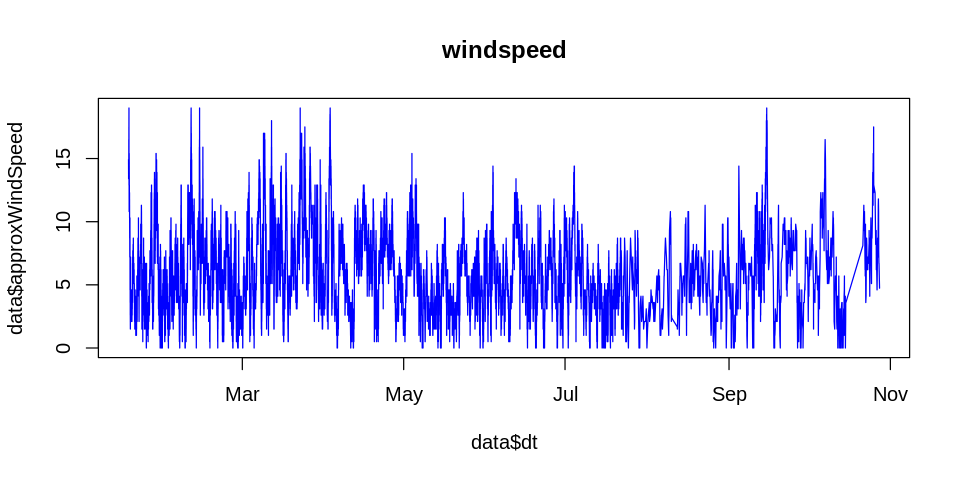

In [25]:
# plot windspeed over year
plot(data$dt, data$approxWindSpeed, main= "windspeed", type= "l", col = "blue")

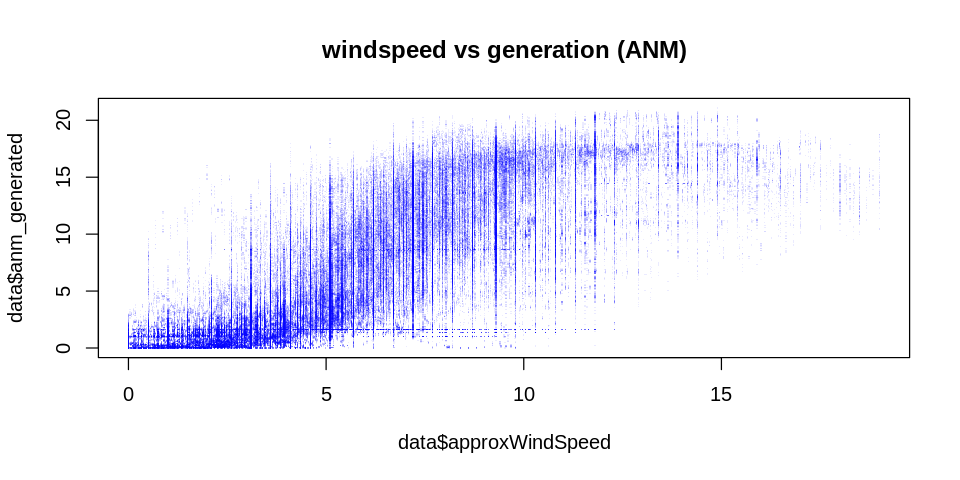

In [22]:
plot(data$approxWindSpeed, data$anm_generated, main='windspeed vs generation (ANM)', type="p",col=alpha(c("blue"), 0.08), pch=46)

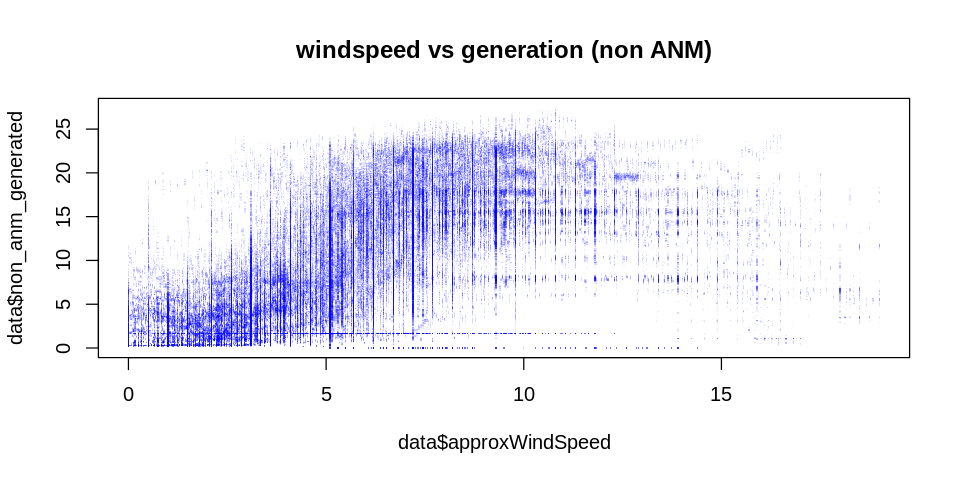

In [23]:
plot(data$approxWindSpeed, data$non_anm_generated, main='windspeed vs generation (non ANM)', type="p",col=alpha(c("blue"), 0.08), pch=46)

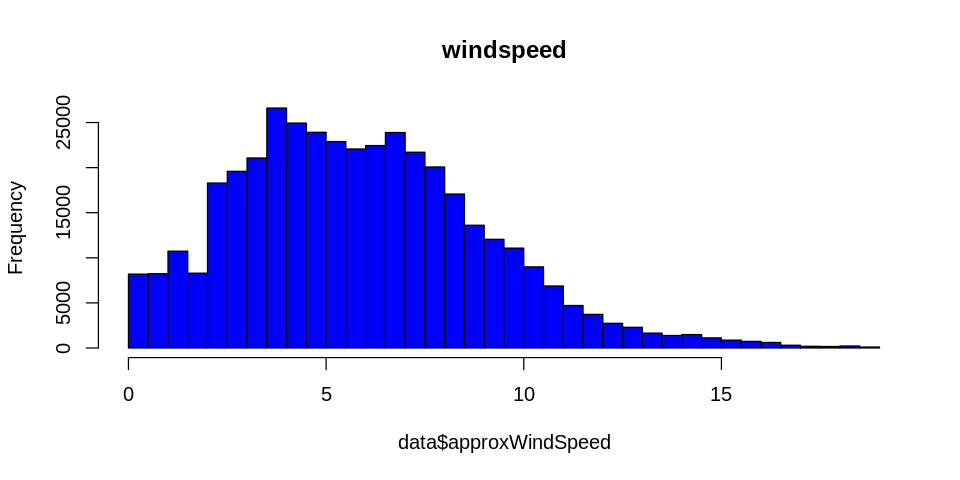

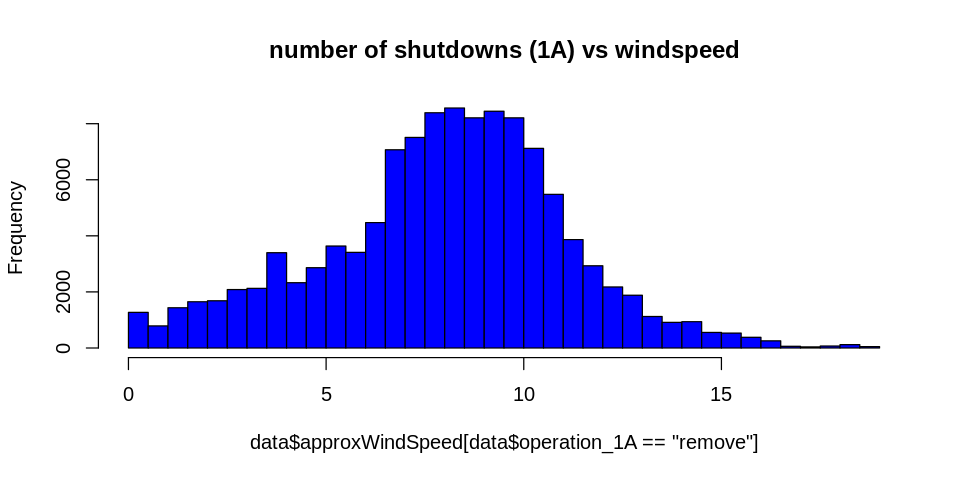

In [24]:
hist(data$approxWindSpeed, 60,main= "windspeed", col = "blue")
hist(data$approxWindSpeed[data$operation_1A=="remove"], 60,main= "number of shutdowns (1A) vs windspeed", col = "blue")

In [6]:
unique(data$operation_core)
levels(data$operation_core)

[1] ok      warning remove 
Levels: ok remove warning

[1] "ok"      "remove"  "warning"

In [7]:
anmlabels <- c(0,1,2)
names(anmlabels) <- c("ok", "warning", "remove")

anmlabels

ok warning  remove 
      0       1       2

In [8]:
data$operation_core[1]
anmlabels["ok"]
anmlabels[data$operation_core[1]]

[1] ok
Levels: ok remove warning

ok 
 0

ok 
 0

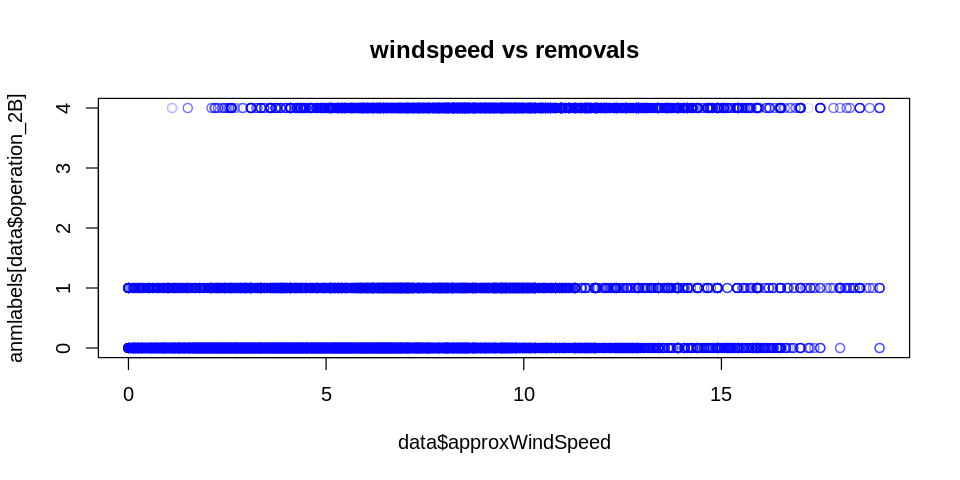

In [26]:
plot(data$approxWindSpeed, anmlabels[data$operation_2B], main='windspeed vs removals',col=alpha(c("blue"), 0.08), type="p")

In [9]:
anmlabels <- c(0,1,2)
data$anmcount <- anmlabels[data$operation_core]+
  anmlabels[data$operation_1]+
  anmlabels[data$operation_1A]+
  anmlabels[data$operation_2]+
  anmlabels[data$operation_2A]+
  anmlabels[data$operation_2B]+
  anmlabels[data$operation_3]+
  anmlabels[data$operation_4]+
  anmlabels[data$operation_4A]

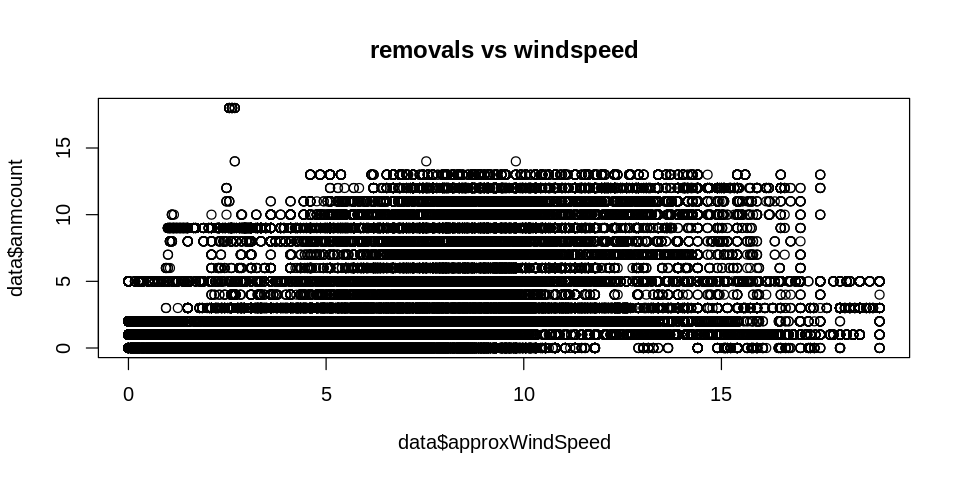

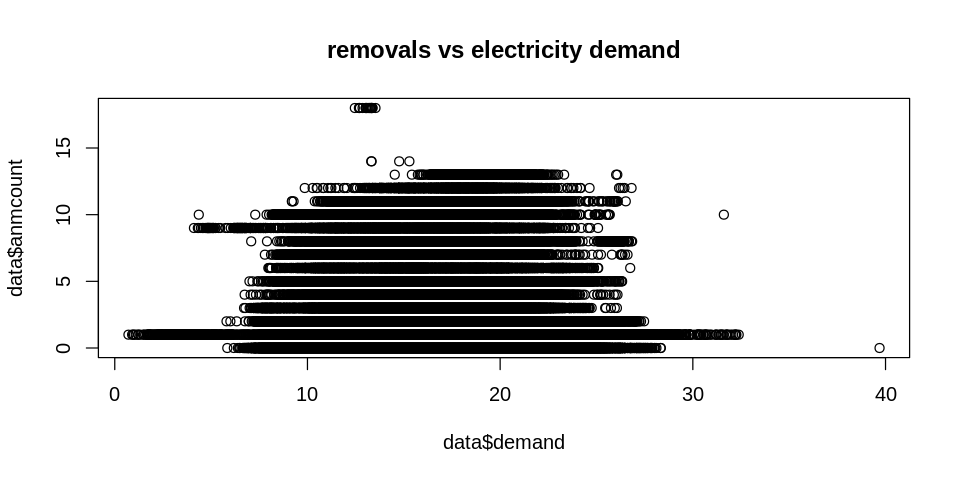

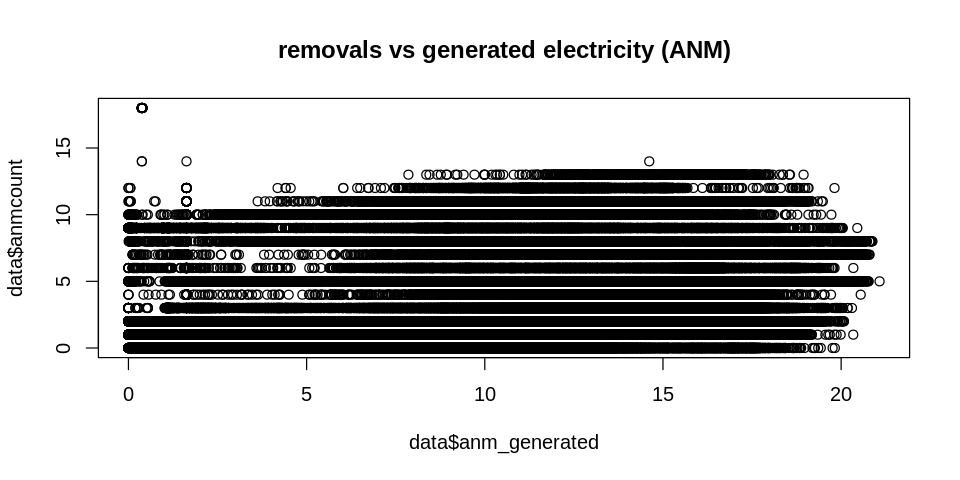

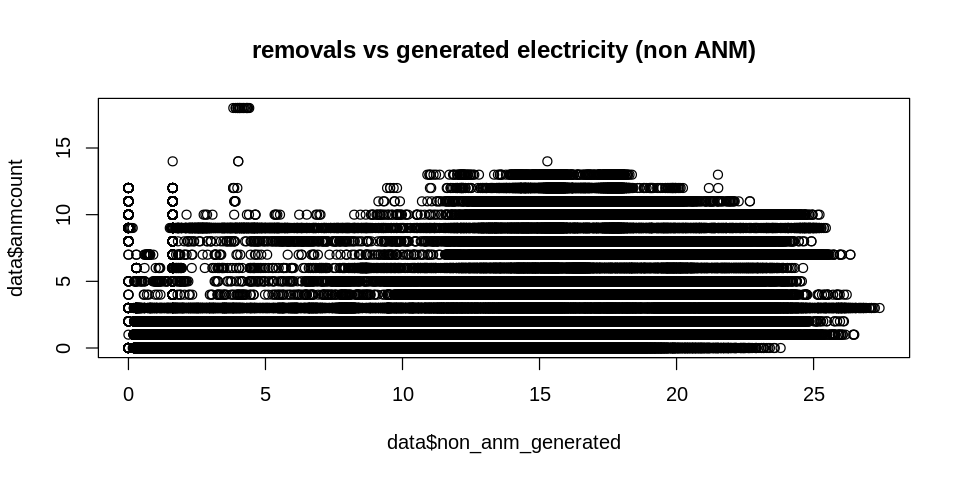

In [10]:
#  set default output size for plots to 8 inches by 4 inches.
options(repr.plot.width=8, repr.plot.height=4)
plot(data$approxWindSpeed, data$anmcount, main='removals vs windspeed', type="p")
plot(data$demand, data$anmcount, main='removals vs electricity demand', type="p")
plot(data$anm_generated, data$anmcount, main='removals vs generated electricity (ANM)', type="p")
plot(data$non_anm_generated, data$anmcount, main='removals vs generated electricity (non ANM)', type="p")

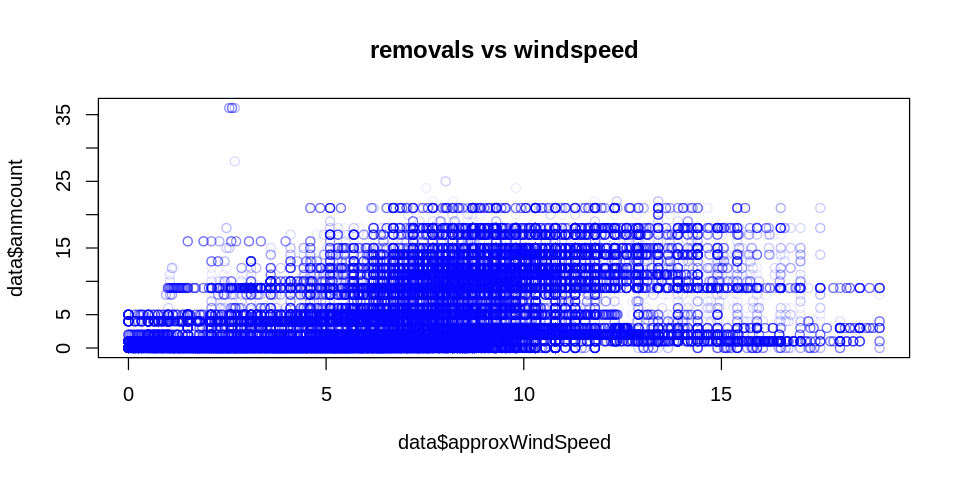

In [11]:
# redraw charts with removals weighted much mre strongly than warnings

anmlabels <- c(0,1,4)
data$anmcount <- anmlabels[data$operation_core]+
  anmlabels[data$operation_1]+
  anmlabels[data$operation_1A]+
  anmlabels[data$operation_2]+
  anmlabels[data$operation_2A]+
  anmlabels[data$operation_2B]+
  anmlabels[data$operation_3]+
  anmlabels[data$operation_4]+
  anmlabels[data$operation_4A]

plot(data$approxWindSpeed, data$anmcount, main='removals vs windspeed',col=alpha(c("blue"), 0.08), type="p")

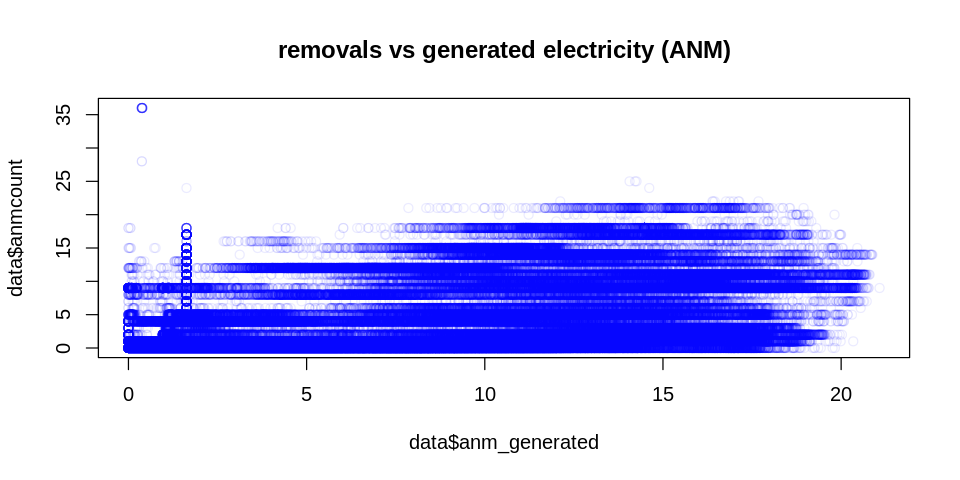

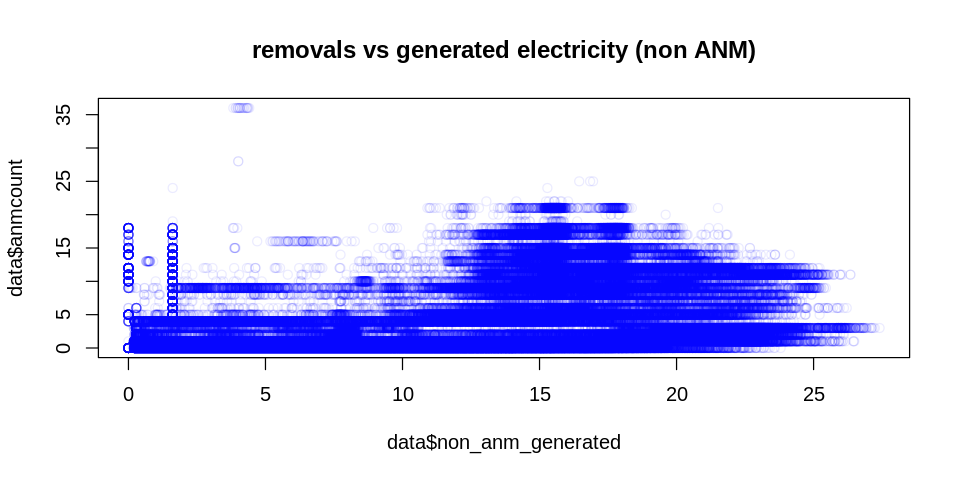

In [12]:
plot(data$anm_generated, data$anmcount, main='removals vs generated electricity (ANM)',col=alpha(c("blue"), 0.08), type="p")
plot(data$non_anm_generated, data$anmcount, main='removals vs generated electricity (non ANM)',col=alpha(c("blue"), 0.08), type="p")

In [4]:
data[1,c(10,11, 13,14, 16,17, 19,20, 22,23, 25,26, 28,29, 31,32, 34,35)]

eqpt_core,site_core,eqpt_1,site_1,eqpt_1A,site_1A,eqpt_2,site_2,eqpt_2A,site_2A,eqpt_2B,site_2B,eqpt_3,site_3,eqpt_4,site_4,eqpt_4A,site_4A
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok


In [7]:
data[1,c(10,11, 13,14, 16,17, 19,20, 22,23, 25,26, 28,29, 31,32, 34,35)]
data[1:10, c(10,11, 13,14, 16,17, 19,20, 22,23, 25,26, 28,29, 31,32, 34,35)]
sapply(data[1:10, c(10,11, 13,14, 16,17, 19,20, 22,23, 25,26, 28,29, 31,32, 34,35)],"==","ok")
length(data$elec_timestamp)
rowSums(sapply(data[1:10, c(10,11, 13,14, 16,17, 19,20, 22,23, 25,26, 28,29, 31,32, 34,35)],"==","ok"))
sum(rowSums(sapply(data[, c(10,11, 13,14, 16,17, 19,20, 22,23, 25,26, 28,29, 31,32, 34,35)],"==","ok"))==18)

eqpt_core,site_core,eqpt_1,site_1,eqpt_1A,site_1A,eqpt_2,site_2,eqpt_2A,site_2A,eqpt_2B,site_2B,eqpt_3,site_3,eqpt_4,site_4,eqpt_4A,site_4A
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok


eqpt_core,site_core,eqpt_1,site_1,eqpt_1A,site_1A,eqpt_2,site_2,eqpt_2A,site_2A,eqpt_2B,site_2B,eqpt_3,site_3,eqpt_4,site_4,eqpt_4A,site_4A
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok


eqpt_core,site_core,eqpt_1,site_1,eqpt_1A,site_1A,eqpt_2,site_2,eqpt_2A,site_2A,eqpt_2B,site_2B,eqpt_3,site_3,eqpt_4,site_4,eqpt_4A,site_4A
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


[1] 395055

[1] 18 18 18 18 18 18 18 18 18 18

[1] 327315

In [9]:
data[rowSums(sapply(data[, c(10,11, 13,14, 16,17, 19,20, 22,23, 25,26, 28,29, 31,32, 34,35)],"==","ok"))!=18, c(10,11, 13,14, 16,17, 19,20, 22,23, 25,26, 28,29, 31,32, 34,35)]

,eqpt_core,site_core,eqpt_1,site_1,eqpt_1A,site_1A,eqpt_2,site_2,eqpt_2A,site_2A,eqpt_2B,site_2B,eqpt_3,site_3,eqpt_4,site_4,eqpt_4A,site_4A
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
3433,ok,remove,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
3434,ok,remove,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
3435,ok,remove,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
3436,ok,remove,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
3437,ok,remove,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
3438,ok,remove,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
3439,ok,remove,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
3440,ok,remove,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok
3441,ok,remove,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok


In [13]:
filtered_data <- data[rowSums(sapply(data[, c(10,11, 13,14, 16,17, 19,20, 22,23, 25,26, 28,29, 31,32, 34,35)],"==","ok"))==18, ]

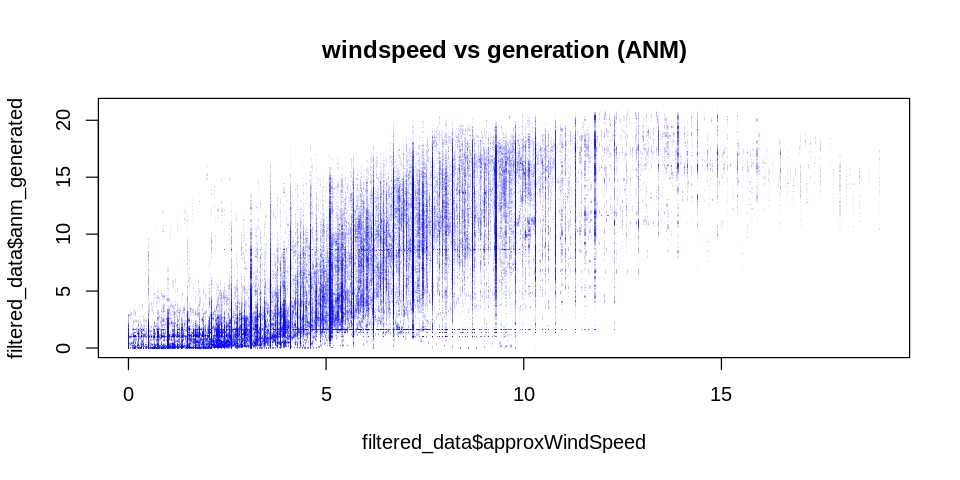

In [15]:
plot(filtered_data$approxWindSpeed, filtered_data$anm_generated, main='windspeed vs generation (ANM)', type="p",col=alpha(c("blue"), 0.08), pch=46)

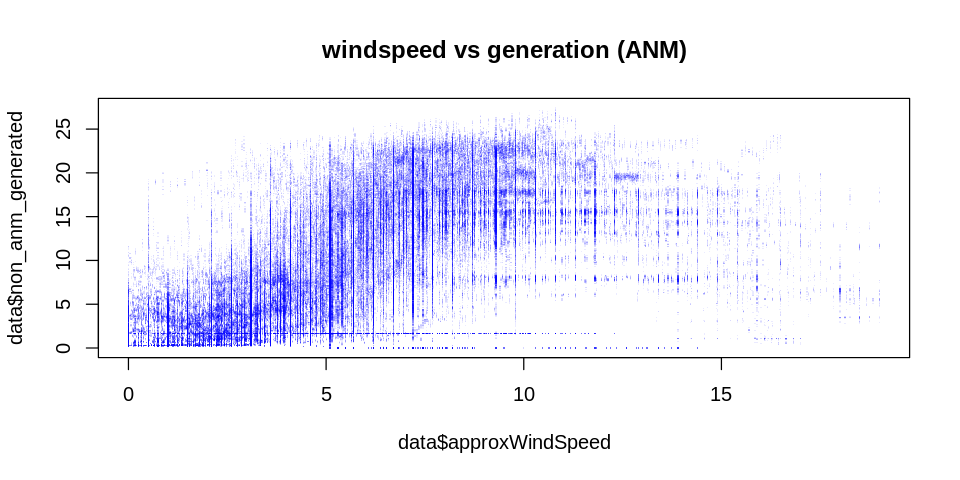

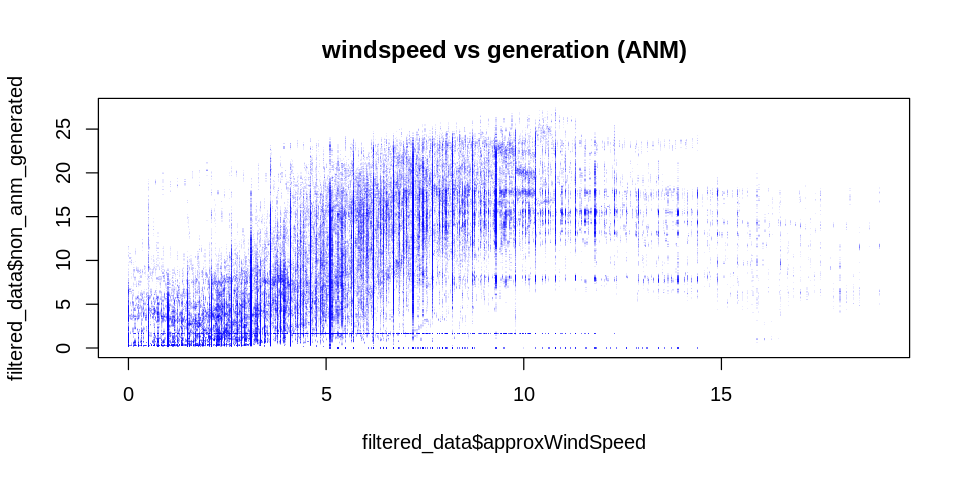

In [29]:
plot(data$approxWindSpeed, data$non_anm_generated, main='windspeed vs generation (ANM)', type="p",col=alpha(c("blue"), 0.08), pch=46)
plot(filtered_data$approxWindSpeed, filtered_data$non_anm_generated, main='windspeed vs generation (ANM)', type="p",col=alpha(c("blue"), 0.08), pch=46)

In [28]:
length(data$elec_timestamp)
length(filtered_data$elec_timestamp)
length(filtered_data$approxWindSpeed)

[1] 395055

[1] 327315

[1] 327315